# <center> CALORIES BURNED ON WORKOUT </center>
## <center> (Regression Exercises) </center>
In this notebook, I applied different regression techniques to predict the data of calories burned in the exercises from the knowledge of duration (t), heart rate (h), body temperature (T), age (A), weight (W), height (H) and gender (G). It was verified that the variable that most influences the burning of calories is duration, followed by heart rate and body temperature. However, only with the considerations of all set of features that was possible to reduce the error to less than 1% of the mean. From the following table, we can see the models adopted an the mean error of each one.

    
| Regression Model | Mean Error | R2   |
|-----------|------------|------|
| Linear    | 13.59       | 0.904 |
| Quadratic | 11.36       | 0.922 |
| PowerLaw  | 12.02      | 0.895 |
| Multi-Linear (t,H) | 11.67      | 0.94 |
| Multi-Quadratic (t,H) | 8.29      | 0.96 |
| Multi-PowerLaw (t,H) | 8.59      | 0.96 |
| Multi-Linear (t,H,T) | 10.64      | 0.94 |
| Multi-Quadratic (t,H,T) | 8.31      | 0.95 |
| Multi-Linear (all feat.) | 8.44      | 0.97 |
| Multi-Quadratic (all feat.) | 2.24      | 0.997 |
| Multi-Cubic (all feat.) | 0.25      | 1.00 |
| Multi-Quartic (all feat.) | 0.25      | 1.00 |
    


# Pre-Processing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scipy for statistics
#import scipy


from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

data/calories.csv
data/exercise.csv


In [2]:
# Dataframe to models
df_model_properties = pd.DataFrame({
    'Model':['linear_t','quad_t','SPPM_t','DPPM_t',
             'multlin_th','multquad_th','power_th',
             'multlin_tht','multquad_tht',
             'multlin_all','multquad_all',
             'multcub_all',
             'multquart_all'],
    
    'Features': [['t'],['t'],['t'],['t'],['t','h'],
                 ['t','h'],['t','h'],['t','h','T'],
                 ['t','h','T'],['t','h','T','A','W','H'],
                 ['t','h','T','A','W','G','H'],
                 ['t','h','T','A','W','G','H'],
                 ['t','h','T','A','W','G','H']],
    'MAE_test':['','','','','','','','','','','','',''],
    'R2_test':['','','','','','','','','','','','',''],
    'MAE_train':['','','','','','','','','','','','',''],
    'R2_train':['','','','','','','','','','','','','']
}).set_index('Model')

### Import Dataset

In [3]:
# Import Calories Dataset
df_cal = pd.read_csv(os.path.join(dirname,'calories.csv'))

# Import Exercises Dataset
df_ex  = pd.read_csv(os.path.join(dirname,'exercise.csv'))

# Merging Datasets
df = pd.merge(df_ex, df_cal, on = 'User_ID')
df.head()

# Get dummies
df['Gender'] = pd.get_dummies(df['Gender'], prefix_sep='_', drop_first=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


### Features Influences on Calories

Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
Name: Calories, dtype: float64


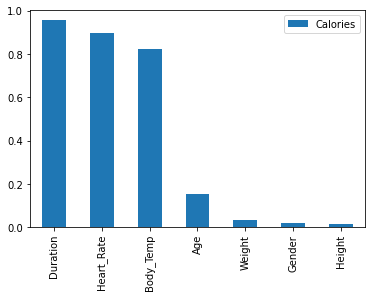

In [4]:
correlations = df.drop(columns=['User_ID'],axis=1).copy().corr()['Calories']
correlations = correlations.sort_values(ascending=False).drop('Calories',axis=0)
print(correlations)
correlations.to_frame().plot.bar();

From here, it is possible to see that the features that most contribute to the total calory burned on exercises is the 'duration', the 'heart rate' and the 'body temperature'

Let's rename the variables as:

* $t$ : Duration
* $h$ : Heart_Rate
* $T$ : Body_Temp
* $A$ : Age
* $W$ : Weight
* $G$ : Gender
* $H$ : Height
* $C$ : Calories

### Scatter Matrix

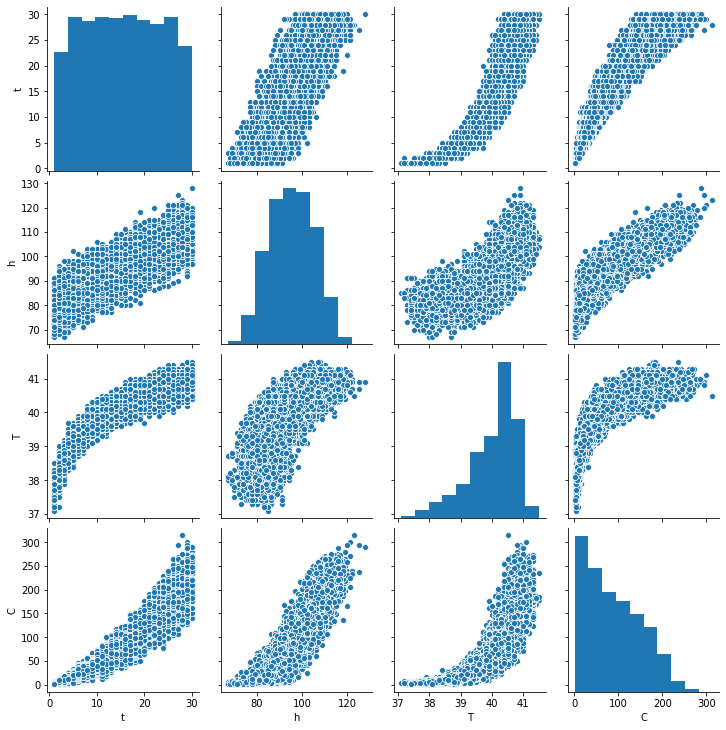

In [5]:
df_3f = df[['Duration','Heart_Rate','Body_Temp','Calories']].copy()
df_3f.rename(columns={'Duration':'t',
                      'Heart_Rate':'h',
                      'Body_Temp':'T',
                      'Calories':'C'},inplace=True)


df_6f = df[['Duration','Heart_Rate','Body_Temp','Age','Weight','Height','Calories']].copy()
df_6f.rename(columns={'Duration':'t',
                      'Heart_Rate':'h',
                      'Body_Temp':'T',
                      'Age':'A',
                      'Weight':'W',
                      'Height':'H',
                      'Calories':'C'},inplace=True)


df_7f = df[['Duration','Heart_Rate','Body_Temp','Age','Weight','Gender','Height','Calories']].copy()
df_7f.rename(columns={'Duration':'t',
                      'Heart_Rate':'h',
                      'Body_Temp':'T',
                      'Age':'A',
                      'Weight':'W',
                      'Gender':'G',
                      'Height':'H',
                      'Calories':'C'},inplace=True)

sns.pairplot(df_3f)

From the scatter graphics, it's possible to conclude that, despite the strong correlation between the variables $t$ and $C$, the relation between them is not trivially linear. It's possible that a quadratic regression approach can substantially reduce the errors. Another way to deal with this problem is with power law models. To do this, let's check the relation betweeen logs of variables.

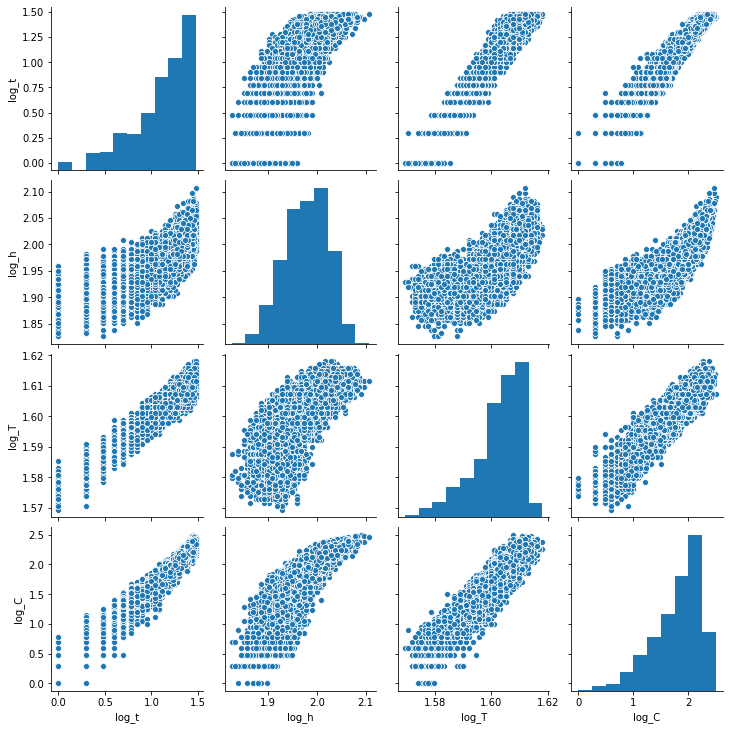

In [6]:
conditions = True
conditions &= df_3f['C'] > 0
conditions &= df_3f['t'] > 0

df_3f_log = np.log10(df_3f[conditions]).copy()

df_3f_log.rename(columns={'t':'log_t',
                      'h':'log_h',
                      'T':'log_T',
                      'C':'log_C'},inplace=True)

sns.pairplot(df_3f_log)

# 1. One Feature Regression

In [7]:
# Splitting into test and train

C_i = df_3f['C'].to_numpy()
t_i = df_3f['t'].to_numpy()
t_train, t_test, C_train, C_test = train_test_split(t_i, C_i, test_size=0.333, random_state=42)

logC_i = df_3f_log['log_C'].to_numpy()
logt_i = df_3f_log['log_t'].to_numpy()
logt_train, logt_test, logC_train, logC_test = train_test_split( logt_i, logC_i, test_size=0.333, random_state=42)

As a first step, let's calculate the regression relating **Calories** and **Duration**, that are the most correlated variables.

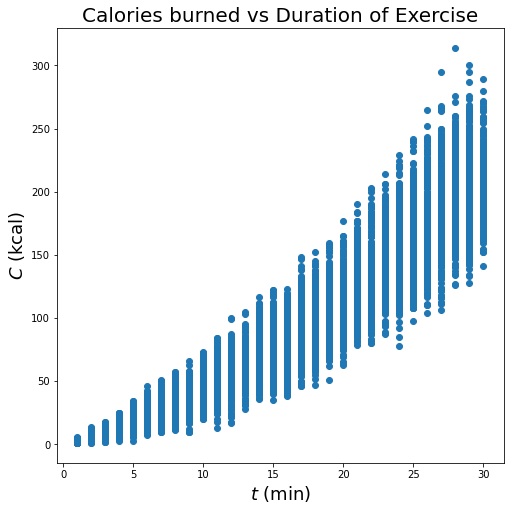

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(df_3f['t'],df_3f['C'])
plt.xlabel('$t$ (min)', size = 18)
plt.ylabel('$C$ (kcal)', size = 18)
plt.title('Calories burned vs Duration of Exercise', size = 20)
plt.show()

## 1.a Linear Model

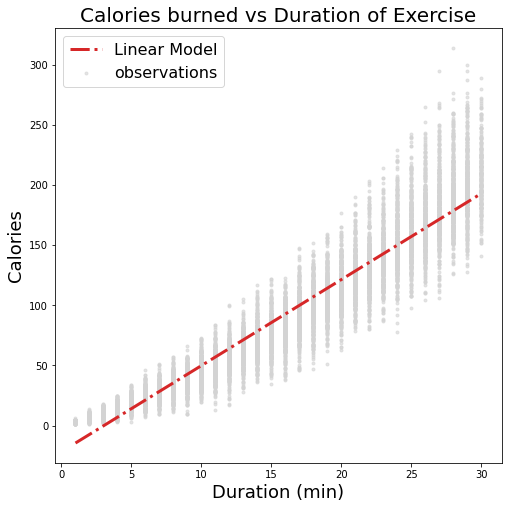

In [9]:
# Create a lineat regression object
lin_reg = linear_model.LinearRegression()

# Train the model using the training sets
lin_reg.fit(t_train.reshape(-1,1)   ,C_train.reshape(-1,1))

# Selecting a interval for duration
t_val = np.linspace(t_i.min(),t_i.max(),100)

# Predicting
C_lin_model = lin_reg.predict(t_val.reshape(-1,1))

# Plotting and comparing
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_lin_model, c='tab:red',ls='-.', label = 'Linear Model', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);
plt.savefig('results/C_x_t_Linear_Regression.png')

In [10]:
# Predictions for the test set
C_lin_test = lin_reg.predict(t_test.reshape(-1,1))

# Predictions for the train set
C_lin_train = lin_reg.predict(t_train.reshape(-1,1))

# Filling dataframe
df_model_properties.loc['linear_t']['MAE_test'] = mean_absolute_error(C_lin_test,C_test)
df_model_properties.loc['linear_t']['R2_test'] = r2_score(C_lin_test,C_test)
df_model_properties.loc['linear_t']['MAE_train'] = mean_absolute_error(C_lin_train,C_train)
df_model_properties.loc['linear_t']['R2_train'] = r2_score(C_lin_train,C_train)

# Printing  results
print('Mean error (test): ',df_model_properties.loc['linear_t']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['linear_t']['R2_test'])


print('\nMean error (train): ',df_model_properties.loc['linear_t']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['linear_t']['R2_train'])


Mean error (test):  13.593873543531656
R2 (test):     0.9026309937324182

Mean error (train):  13.502767761900637
R2 (train):   0.9044073844231749


## 1.b Quadratic Model

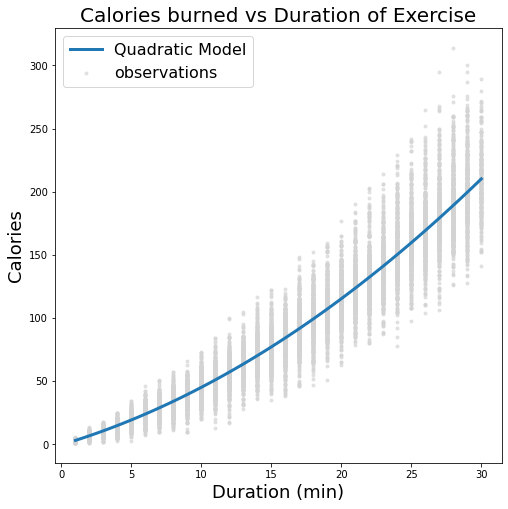

In [11]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# Create a linear regression object
quad_reg = linear_model.LinearRegression()

# Reshaping feature
T_train = t_train.reshape(-1,1)

# Transfomr features to a polynomial regression
quad = PolynomialFeatures(degree=2)
T_train_quad = quad.fit_transform(T_train)

# Training
quad_reg.fit(T_train_quad ,C_train.reshape(-1,1))

# Selecting a interval for duration an adapting shape
T_val = np.linspace(t_i.min(),t_i.max(),100).reshape(-1,1)
T_val_quad = quad.fit_transform(T_val)

# Predicting values
C_quad_model = quad_reg.predict(T_val_quad)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_quad_model, label = 'Quadratic Model', c='tab:blue', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);
plt.savefig('results/C_x_t_Quadratic_Regression.png')

In [12]:
C_quad_test = quad_reg.predict(quad.fit_transform(t_test.reshape(-1,1)))
C_quad_train = quad_reg.predict(quad.fit_transform(t_train.reshape(-1,1)))

df_model_properties.loc['quad_t']['MAE_test'] = mean_absolute_error(C_quad_test,C_test)
df_model_properties.loc['quad_t']['R2_test'] = r2_score(C_quad_test,C_test)
df_model_properties.loc['quad_t']['MAE_train'] = mean_absolute_error(C_quad_train,C_train)
df_model_properties.loc['quad_t']['R2_train'] = r2_score(C_quad_train,C_train)


print('Mean error (test): ',df_model_properties.loc['quad_t']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['quad_t']['R2_test'])


print('\nMean error (train): ',df_model_properties.loc['quad_t']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['quad_t']['R2_train'])


Mean error (test):  11.365273283651955
R2 (test):     0.9235407715434064

Mean error (train):  11.344388456602674
R2 (train):   0.9225497042024959


## Comparison

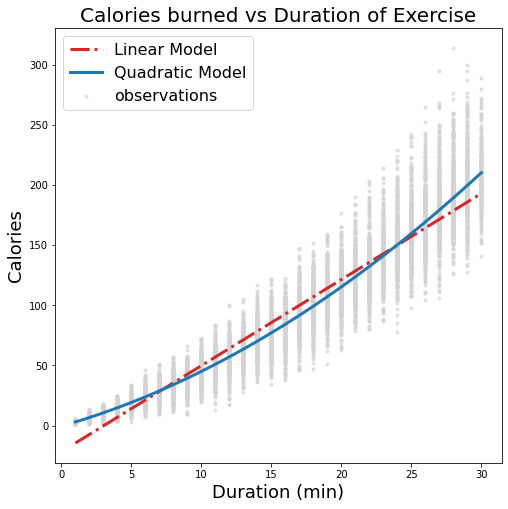

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_lin_model, c='tab:red',ls='-.', label = 'Linear Model', lw = 3,zorder=2)
plt.plot(t_val,C_quad_model, label = 'Quadratic Model', c='tab:blue', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);
plt.savefig('results/C_x_t_Linear_x_Quadratic.png')

## 1.c Power Law Models

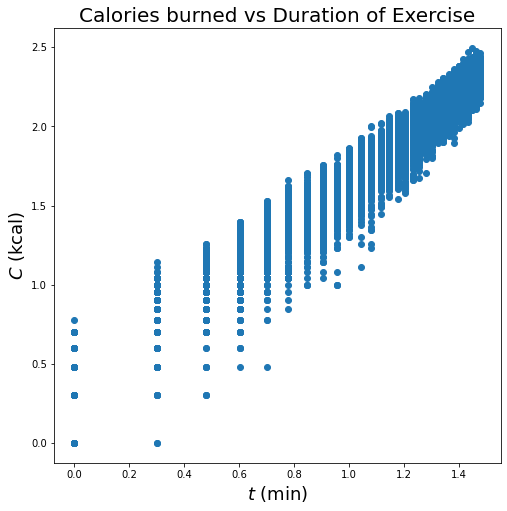

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(df_3f_log['log_t'],df_3f_log['log_C'])
plt.xlabel('$t$ (min)', size = 18)
plt.ylabel('$C$ (kcal)', size = 18)
plt.title('Calories burned vs Duration of Exercise', size = 20)
plt.show()

Proposing a linear correlation between these quantities is equivalent to:


<center>
$\log_{10}\left(\frac{C}{\text{kcal}}\right)=c_{0}+c_{1}\log_{10}\left(\frac{t}{\min}\right)\label{eq:lin_model_log} \tag{1}$
</center>

or:

<center>
$\frac{C}{\text{kcal}}=10^{c_{0}}\left(\frac{t}{\min}\right)^{c_{1}}\label{eq:lin_model} \tag{2}$
</center>

where $c_0$ is the linear coefficient and $c_1$ the slope of the line.


### 1.c.1 Single Parameter Power Model (SPPM)

An initial approach here is to fix $c_0 = 0$ in Eq.$(1)$, since that is intuitive that there are no calories burning if the exercise time is zero. But this is not the approach that guarantees the minimum error for regression. Just for fun, let's see what we could do if this consideration was taken seriously:

<center>
$\log_{10}\left(\frac{C}{\text{kcal}}\right)=c_{1}\log_{10}\left(\frac{t}{\min}\right)\label{eq:sim_log_model} \tag{3}$
</center>

First of all, we want to minimize the mean squared errors:

<center>$E_{\text{MS}}=\frac{1}{N}\sum_{i=1}^{N}\left[\log C(t_{i})-\log C_{i}\right]^{2}, \label{eq:sim_log_model_err} \tag{4}$</center>


vanishing the partial derivative with respect to $c_1$:

<center>$\frac{\partial E_{\text{MS}}}{\partial c_{1}}=0 .\label{eq:sim_log_min} \tag{5}$</center>


Expanding the formula for the errors:

<center>$
\begin{align*}
E_{\text{MS}} & =\frac{1}{N}\sum_{i=1}^{N}\left(\text{log}C-\text{log}C_{i}\right)^{2}=\frac{1}{N}\sum_{i=1}^{N}\left(c_{1}\log_{10}t_{i}-\text{log}C_{i}\right)^{2}\\
 & =c_{1}^{2}\frac{1}{N}\sum_{i=1}^{N}\left(\log_{10}t_{i}\right)^{2}-2c_{1}\frac{1}{N}\sum_{i=1}^{N}\left(\log_{10}C_{i}\right)\left(\log_{10}t_{i}\right)+\frac{1}{N}\sum_{i=1}^{N}\left(\text{log}C_{i}\right)^{2}
\end{align*}
$</center>


 


Applying the minimization condition $(5)$:

<center>$
\begin{align*}
\frac{\partial E_{\text{MS}}}{\partial c_{1}} & =0\\
2c_{1}\frac{1}{N}\sum_{i=1}^{N}\left(\log_{10}t_{i}\right)^{2}-2\frac{1}{N}\sum_{i=1}^{N}\left(\log_{10}C_{i}\right)\left(\log_{10}t_{i}\right)+0 & =0
\end{align*}
$</center>

So, the formula for $c_1$ is:
<center>$
\begin{equation}
c_{1}=\frac{\sum_{i=1}^{N}\left(\log_{10}C_{i}\right)\left(\log_{10}t_{i}\right)}{\sum_{i=1}^{N}\left(\log_{10}t_{i}\right)^{2}}
\label{eq:sim_log_par_0} \tag{6}
\end{equation}
$</center>

With the value of $c_1$, we have the mathematical expression relating calories and exercise duration:

&nbsp;
<center>$\begin{equation}
\frac{C}{\text{kcal}}=\left(\frac{t}{\min}\right)^{c_{1}} .
\end{equation}$</center>

In [16]:
# In fact, this is the only calculation for this method
c_1 = np.dot(logC_train,logt_train)/np.dot(logt_train,logt_train)

print('The value of c_1 is: ',c_1)

# With the value of c1, its possible to define a predict function
def sing_par_predict(t,c1 = c_1):
    return np.power(t,c1) 

The value of c_1 is:  1.6065812051542223


Comparing the model with data. Not the logs, but the original dataset.

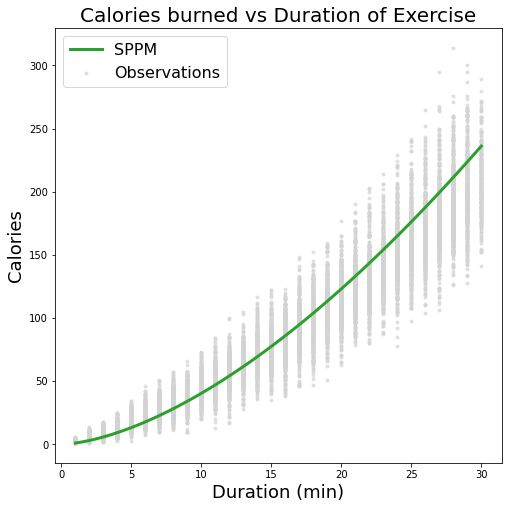

In [18]:
t_val = np.linspace(t_i.min(),t_i.max(),100)
C_sing = sing_par_predict(t_val)

plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'Observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_sing, c='tab:green',ls='-', label = 'SPPM', linewidth = 3)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);
plt.savefig('results/C_x_t_PowerLaw1P_Regression.png')

To check if it is a good fit, let's import metrics from sklearn:

In [19]:
C_sppm_test = sing_par_predict(t_test)
C_sppm_train = sing_par_predict(t_train)

df_model_properties.loc['SPPM_t']['MAE_test'] = mean_absolute_error(C_sppm_test,C_test)
df_model_properties.loc['SPPM_t']['R2_test'] = r2_score(C_sppm_test,C_test)
df_model_properties.loc['SPPM_t']['MAE_train'] = mean_absolute_error(C_sppm_train,C_train)
df_model_properties.loc['SPPM_t']['R2_train'] = r2_score(C_sppm_train,C_train)

print('Mean error (test): ',df_model_properties.loc['SPPM_t']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['SPPM_t']['R2_test'])


print('\nMean error (train): ',df_model_properties.loc['SPPM_t']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['SPPM_t']['R2_train'])


Mean error (test):  14.112527264878075
R2 (test):     0.9221687473557443

Mean error (train):  14.301879510269107
R2 (train):   0.9186682788191455


### 1.c.2 Double Parameter Power Model (DPPM)¶

![](http://)In the approach of taking the logs of **Calories** and **Duration** columns, the resulting correlations aproximately linear and can be modeled by an affine relation, like Eq. $(1)$ 

In [20]:
# Create a linear regression object
log_reg = linear_model.LinearRegression()

# Train the model using the training sets
log_reg.fit(logt_train.reshape(-1,1),logC_train.reshape(-1,1))

logC_pred = log_reg.predict(logt_test.reshape(-1,1))

def dbl_par_predict(t):
    logt = np.log10(t)
    return  np.power(10,log_reg.predict(logt)) 

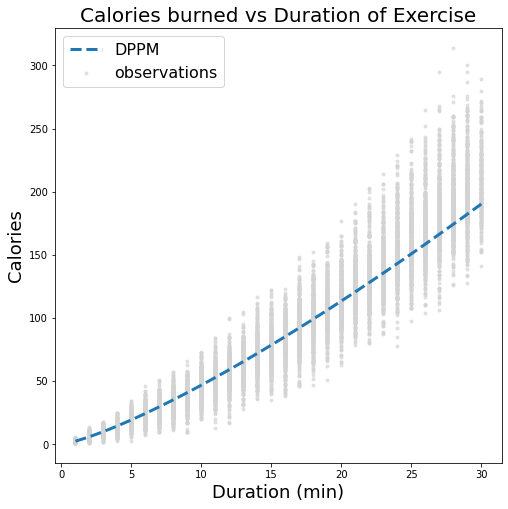

In [22]:
t_val = np.linspace(t_i.min(),t_i.max(),100)
C_log_model = dbl_par_predict(t_val.reshape(-1,1))
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_log_model, c='tab:blue',ls='--', label = 'DPPM', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);
plt.savefig('results/C_x_t_PowerLaw2P_Regression.png')

In [23]:
C_dppm_test = dbl_par_predict(t_test.reshape(-1,1))
C_dppm_train = dbl_par_predict(t_train.reshape(-1,1))


df_model_properties.loc['DPPM_t']['MAE_test'] = mean_absolute_error(C_dppm_test,C_test)
df_model_properties.loc['DPPM_t']['R2_test'] = r2_score(C_dppm_test,C_test)
df_model_properties.loc['DPPM_t']['MAE_train'] = mean_absolute_error(C_dppm_train,C_train)
df_model_properties.loc['DPPM_t']['R2_train'] = r2_score(C_dppm_train,C_train)


print('Mean error (test): ',df_model_properties.loc['DPPM_t']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['DPPM_t']['R2_test'])


print('\nMean error (train): ',df_model_properties.loc['DPPM_t']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['DPPM_t']['R2_train'])


Mean error (test):  12.021118154420346
R2 (test):     0.8917909397979017

Mean error (train):  11.820742431418903
R2 (train):   0.8947519321424053


## 1.f Model Comparison

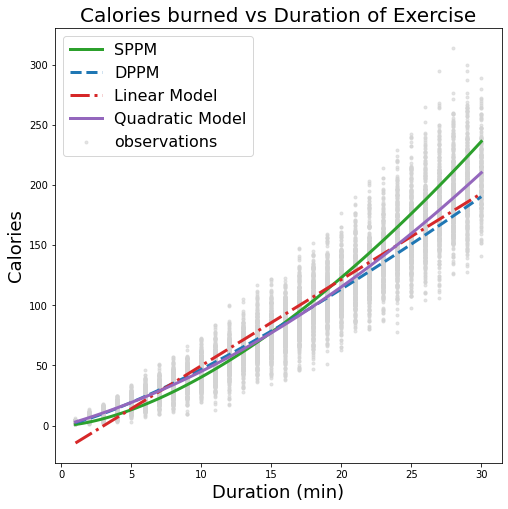

In [24]:
t_val = np.linspace(t_i.min(),t_i.max(),100)
C_lin_model = lin_reg.predict(t_val.reshape(-1,1))
C_log_model = dbl_par_predict(t_val.reshape(-1,1))
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_sing, c='tab:green',ls='-', label = 'SPPM', lw = 3,zorder=2)
plt.plot(t_val,C_log_model, c='tab:blue',ls='--', label = 'DPPM', lw = 3,zorder=2)
plt.plot(t_val,C_lin_model, c='tab:red',ls='-.', label = 'Linear Model', lw = 3,zorder=2)
plt.plot(t_val,C_quad_model, label = 'Quadratic Model', c='tab:purple', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);
plt.savefig('results/C_x_t_ModelComparison.png')

### Report

* From visual inspection of graphs, it was found that the three most correlated amounts to calories are respectively **Duration**, **Heart Rate** and **Body Temperature**.

* The intial approach was to study only the influence of **Duration** (t) on **Calories**(C). To do this, it was proposed five different models:


    
| Model     | Mean Error | R2   |
|-----------|------------|------|
| Linear    | 13.59       | 0.904 |
| Quadratic | 11.36       | 0.922 |
| SPPM      | 14.11       | 0.919 |
| DPPM      | 12.02      | 0.895 |
| TPPM      | 11.40      | 0.919 |
    


* The linear regression model is the stardard approach when we observe a set of correlated 2-D data and will be used as comparison.

* The Power Law models, although not linear, can be linearized considering $\log_{10}t$ and $\log_{10}C$ as feature and target.

* The model SPPM is just a toy model. Since it has just 1 parameter, it was expected that its statistics were the worst. Although it showed a good value of R2, the error is significantly higher than those presented by the other models.

*  The DPPM, as the linear regression, is a 2-parameter model. Observing that the mean error is lower than the error of linear regression, in this case, we can find benefits in use of the logs on the datasets.

* **Quadratic regression** is the approach with lowest error and best R2

# 2. Double Feature Regression

In [25]:
# Organization of dataset
TH_i = df_3f[['t','h']].to_numpy()
C_i = df_3f['C'].to_numpy().reshape(-1,1)
TH_trn, TH_tst, C_trn, C_tst = train_test_split( TH_i,C_i, test_size=0.333, random_state=42)

# Organization of log dataset
logTH_i = df_3f_log[['log_t','log_h']].to_numpy()
logC_i = df_3f_log['log_C'].to_numpy().reshape(-1,1)
logTH_trn, logTH_tst, logC_trn, logC_tst = train_test_split(logTH_i,logC_i,test_size=0.333, random_state=42)

## 2.a Linear Regression (2D)

In [26]:
# Create regression object
ML2 = linear_model.LinearRegression()

# Train the model using the training sets
ML2.fit(TH_trn,C_trn)

# Predicting for test and train
C_ml2_tst = ML2.predict(TH_tst)
C_ml2_trn = ML2.predict(TH_trn)

# Updating results dataframe
df_model_properties.loc['multlin_th']['MAE_test'] = mean_absolute_error(C_tst,C_ml2_tst)
df_model_properties.loc['multlin_th']['R2_test'] = r2_score(C_tst,C_ml2_tst)
df_model_properties.loc['multlin_th']['MAE_train'] = mean_absolute_error(C_trn,C_ml2_trn)
df_model_properties.loc['multlin_th']['R2_train'] = r2_score(C_trn,C_ml2_trn)

# Showing
print('Mean error (test): ',df_model_properties.loc['multlin_th']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multlin_th']['R2_test'])
print('\nMean error (train): ',df_model_properties.loc['multlin_th']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multlin_th']['R2_train'])


Mean error (test):  11.667718069629428
R2 (test):     0.936710281164849

Mean error (train):  11.493310827379927
R2 (train):   0.9388026851404877


## 2.b Quadratic Regression (2D)

In [27]:
MQ2 = linear_model.LinearRegression()

MQ2_poly = PolynomialFeatures(degree=2)

TH_trn_pl = MQ2_poly.fit_transform(TH_trn)

TH_tst_pl = MQ2_poly.fit_transform(TH_tst)

MQ2.fit(TH_trn_pl,C_trn)

C_mq2_tst = MQ2.predict(TH_tst_pl)

C_mq2_trn = MQ2.predict(TH_trn_pl)

df_model_properties.loc['multquad_th']['MAE_test'] = mean_absolute_error(C_tst,C_mq2_tst)
df_model_properties.loc['multquad_th']['R2_test'] = r2_score(C_tst,C_mq2_tst)
df_model_properties.loc['multquad_th']['MAE_train'] = mean_absolute_error(C_trn,C_mq2_trn)
df_model_properties.loc['multquad_th']['R2_train'] = r2_score(C_trn,C_mq2_trn)


print('Mean error (test): ',df_model_properties.loc['multquad_th']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multquad_th']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multquad_th']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multquad_th']['R2_train'])


Mean error (test):  8.296957448492794
R2 (test):     0.9610619558653578

Mean error (train):  8.137972011298148
R2 (train):   0.9624337462717035


## 2.c Linear Regression on Log-Scaled Data

In [28]:
MP1 = linear_model.LinearRegression()

MP1.fit(logTH_trn,logC_trn)

def power_pth_predict(TH):
    logTH = np.log10(TH)
    return  np.power(10,MP1.predict(logTH))

In [29]:
C_mp1_tst = power_pth_predict(TH_tst)
C_mp1_trn = power_pth_predict(TH_trn)

df_model_properties.loc['power_th']['MAE_test'] = mean_absolute_error(C_tst,C_mp1_tst)
df_model_properties.loc['power_th']['R2_test'] = r2_score(C_tst,C_mp1_tst)

df_model_properties.loc['power_th']['MAE_train'] = mean_absolute_error(C_trn,C_mp1_trn)
df_model_properties.loc['power_th']['R2_train'] = r2_score(C_trn,C_mp1_trn)


print('Mean error (test): ',df_model_properties.loc['power_th']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['power_th']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['power_th']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['power_th']['R2_train'])


Mean error (test):  8.598564469552045
R2 (test):     0.9594573580056064

Mean error (train):  8.449130114442275
R2 (train):   0.9604518661920016


# 3. Three Feature Regression

In [30]:
THT_i = df_3f[['t','h','T']].to_numpy()
C_i = df_3f['C'].to_numpy().reshape(-1,1)
THT_trn, THT_tst, C_trn, C_tst = train_test_split( THT_i,C_i, test_size=0.333, random_state=42)

logTHT_i = df_3f_log[['log_t','log_h','log_T']].to_numpy()
logC_i = df_3f_log['log_C'].to_numpy().reshape(-1,1)
logTHT_trn, logTHT_tst, logC_trn, logC_tst = train_test_split(logTHT_i,logC_i,test_size=0.333, random_state=42)

## 3.a Linear Regression (3D)

In [31]:
# Create regression object
ML3 = linear_model.LinearRegression()

# Train the model using the training sets
ML3.fit(THT_trn,C_trn)

C_ml3_tst = ML3.predict(THT_tst)
C_ml3_trn = ML3.predict(THT_trn)


df_model_properties.loc['multlin_tht']['MAE_test'] = mean_absolute_error(C_tst,C_ml3_tst)
df_model_properties.loc['multlin_tht']['R2_test'] = r2_score(C_tst,C_ml3_tst)

df_model_properties.loc['multlin_tht']['MAE_train'] = mean_absolute_error(C_trn,C_ml3_trn)
df_model_properties.loc['multlin_tht']['R2_train'] = r2_score(C_trn,C_ml3_trn)


print('Mean error (test): ',df_model_properties.loc['multlin_tht']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multlin_tht']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multlin_tht']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multlin_tht']['R2_train'])

Mean error (test):  10.647808909098178
R2 (test):     0.9451629732671258

Mean error (train):  10.51635353712152
R2 (train):   0.9467824214841805


## 3.b Quadratic Regression (3D)

In [32]:
# Create regression object
MQ3 = linear_model.LinearRegression()

MQ3_poly = PolynomialFeatures(degree=2)
THT_trn_pl = MQ3_poly.fit_transform(THT_trn)
THT_tst_pl = MQ3_poly.fit_transform(THT_tst)


# Train the model using the training sets
MQ3.fit(THT_trn_pl,C_trn)

C_mq3_tst = MQ3.predict(THT_tst_pl)
C_mq3_trn = MQ3.predict(THT_trn_pl)

df_model_properties.loc['multquad_tht']['MAE_test'] = mean_absolute_error(C_tst,C_mq3_tst)
df_model_properties.loc['multquad_tht']['R2_test'] = r2_score(C_tst,C_mq3_tst)

df_model_properties.loc['multquad_tht']['MAE_train'] = mean_absolute_error(C_trn,C_mq3_trn)
df_model_properties.loc['multquad_tht']['R2_train'] = r2_score(C_trn,C_mq3_trn)


print('Mean error (test): ',df_model_properties.loc['multquad_tht']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multquad_tht']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multquad_tht']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multquad_tht']['R2_train'])


Mean error (test):  8.307127256867195
R2 (test):     0.9610771458585454

Mean error (train):  8.142429869735729
R2 (train):   0.9624488806614029


# 5. Regression with all Features

In [33]:
X_i = df_7f[['t','h','T','A','W','G','H']].to_numpy()
C_i = df_7f['C'].to_numpy().reshape(-1,1)
X_trn, X_tst, C_trn, C_tst = train_test_split( X_i,C_i, test_size=0.333, random_state=42)

## 5.a Linear Regression (6D)

In [35]:
# Create regression object
ML6 = linear_model.LinearRegression()

# Train the model using the training sets
ML6.fit(X_trn,C_trn)

C_ml6_tst = ML6.predict(X_tst)
C_ml6_trn = ML6.predict(X_trn)


df_model_properties.loc['multlin_all']['MAE_test'] = mean_absolute_error(C_tst,C_ml6_tst)
df_model_properties.loc['multlin_all']['R2_test'] = r2_score(C_tst,C_ml6_tst)

df_model_properties.loc['multlin_all']['MAE_train'] = mean_absolute_error(C_trn,C_ml6_trn)
df_model_properties.loc['multlin_all']['R2_train'] = r2_score(C_trn,C_ml6_trn)


print('Mean error (test): ',df_model_properties.loc['multlin_all']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multlin_all']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multlin_all']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multlin_all']['R2_train'])

Mean error (test):  8.437652846858738
R2 (test):     0.9664081290862842

Mean error (train):  8.281582033165444
R2 (train):   0.9675871034049008


## 5.b Quadratic Regression (6D)

In [36]:
# Create regression object
MQ6 = linear_model.LinearRegression()

MQ6_poly = PolynomialFeatures(degree=2)
X_trn_pl = MQ6_poly.fit_transform(X_trn)
X_tst_pl = MQ6_poly.fit_transform(X_tst)


# Train the model using the training sets
MQ6.fit(X_trn_pl,C_trn)

C_mq6_tst = MQ6.predict(X_tst_pl)
C_mq6_trn = MQ6.predict(X_trn_pl)

df_model_properties.loc['multquad_all']['MAE_test'] = mean_absolute_error(C_tst,C_mq6_tst)
df_model_properties.loc['multquad_all']['R2_test'] = r2_score(C_tst,C_mq6_tst)

df_model_properties.loc['multquad_all']['MAE_train'] = mean_absolute_error(C_trn,C_mq6_trn)
df_model_properties.loc['multquad_all']['R2_train'] = r2_score(C_trn,C_mq6_trn)


print('Mean error (test): ',df_model_properties.loc['multquad_all']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multquad_all']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multquad_all']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multquad_all']['R2_train'])


Mean error (test):  2.236627675463116
R2 (test):     0.9976665498106849

Mean error (train):  2.201915755482907
R2 (train):   0.9977285590395195


## 5.c Cubic Regression (6D)

In [37]:
# Create regression object
MQ6 = linear_model.LinearRegression()

MQ6_poly = PolynomialFeatures(degree=3)
X_trn_pl = MQ6_poly.fit_transform(X_trn)
X_tst_pl = MQ6_poly.fit_transform(X_tst)


# Train the model using the training sets
MQ6.fit(X_trn_pl,C_trn)

C_mq6_tst = MQ6.predict(X_tst_pl)
C_mq6_trn = MQ6.predict(X_trn_pl)

df_model_properties.loc['multcub_all']['MAE_test'] = mean_absolute_error(C_tst,C_mq6_tst)
df_model_properties.loc['multcub_all']['R2_test'] = r2_score(C_tst,C_mq6_tst)

df_model_properties.loc['multcub_all']['MAE_train'] = mean_absolute_error(C_trn,C_mq6_trn)
df_model_properties.loc['multcub_all']['R2_train'] = r2_score(C_trn,C_mq6_trn)


print('Mean error (test): ',df_model_properties.loc['multcub_all']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multcub_all']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multcub_all']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multcub_all']['R2_train'])


Mean error (test):  0.2538225562304721
R2 (test):     0.9999782665063185

Mean error (train):  0.2504124453548748
R2 (train):   0.9999784303299277


## 5.d Quartic Regression (6D)

In [38]:
# Create regression object
MQ6 = linear_model.LinearRegression()

MQ6_poly = PolynomialFeatures(degree=4)
X_trn_pl = MQ6_poly.fit_transform(X_trn)
X_tst_pl = MQ6_poly.fit_transform(X_tst)


# Train the model using the training sets
MQ6.fit(X_trn_pl,C_trn)

C_mq6_tst = MQ6.predict(X_tst_pl)
C_mq6_trn = MQ6.predict(X_trn_pl)

df_model_properties.loc['multquart_all']['MAE_test'] = mean_absolute_error(C_tst,C_mq6_tst)
df_model_properties.loc['multquart_all']['R2_test'] = r2_score(C_tst,C_mq6_tst)

df_model_properties.loc['multquart_all']['MAE_train'] = mean_absolute_error(C_trn,C_mq6_trn)
df_model_properties.loc['multquart_all']['R2_train'] = r2_score(C_trn,C_mq6_trn)


print('Mean error (test): ',df_model_properties.loc['multquart_all']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multquart_all']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multquart_all']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multquart_all']['R2_train'])


Mean error (test):  0.2552338831415951
R2 (test):     0.9999778601382693

Mean error (train):  0.24715739193931766
R2 (train):   0.9999788452711165


In [39]:
df_model_properties

,Features,MAE_test,R2_test,MAE_train,R2_train
Model,,,,,
linear_t,[t],13.5939,0.902631,13.5028,0.904407
quad_t,[t],11.3653,0.923541,11.3444,0.92255
SPPM_t,[t],14.1125,0.922169,14.3019,0.918668
DPPM_t,[t],12.0211,0.891791,11.8207,0.894752
multlin_th,"[t, h]",11.6677,0.93671,11.4933,0.938803
multquad_th,"[t, h]",8.29696,0.961062,8.13797,0.962434
power_th,"[t, h]",8.59856,0.959457,8.44913,0.960452
multlin_tht,"[t, h, T]",10.6478,0.945163,10.5164,0.946782
multquad_tht,"[t, h, T]",8.30713,0.961077,8.14243,0.962449
